#Import Libraries

In [ ]:
#import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


pyo.init_notebook_mode(connected=True)
cf.go_offline()
from plotly.offline import init_notebook_mode,plot,iplot
plotly.io.renderers.default = 'colab'


#Loading and Reading Dataset

In [ ]:
#load files
from google.colab import files

data = files.upload()

Saving state_wise_daily.csv to state_wise_daily (2).csv


In [ ]:
#read csv files 
df = pd.read_csv('state_wise_daily.csv',parse_dates=['Date','Date_YMD'])

# Exploring Datasets

In [ ]:
df.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,2020-03-14,2020-03-14,Confirmed,81,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,19,0,0,0,14,0,0,0,0,0,0,1,3,0,1,1,0,12,0,0,0
1,2020-03-14,2020-03-14,Recovered,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0
2,2020-03-14,2020-03-14,Deceased,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-03-15,2020-03-15,Confirmed,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,18,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0,0
4,2020-03-15,2020-03-15,Recovered,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0


In [ ]:
df.shape #no. of rows and columns 

(1383, 42)

In [ ]:
df.info() #information of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1383 non-null   datetime64[ns]
 1   Date_YMD  1383 non-null   datetime64[ns]
 2   Status    1383 non-null   object        
 3   TT        1383 non-null   int64         
 4   AN        1383 non-null   int64         
 5   AP        1383 non-null   int64         
 6   AR        1383 non-null   int64         
 7   AS        1383 non-null   int64         
 8   BR        1383 non-null   int64         
 9   CH        1383 non-null   int64         
 10  CT        1383 non-null   int64         
 11  DN        1383 non-null   int64         
 12  DD        1383 non-null   int64         
 13  DL        1383 non-null   int64         
 14  GA        1383 non-null   int64         
 15  GJ        1383 non-null   int64         
 16  HR        1383 non-null   int64         
 17  HP        1383

In [ ]:
df.describe() #description-numerical analysis

,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
count,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.0,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,42456.657990,10.522777,2600.125090,45.013738,657.027477,1036.590022,88.349964,1422.984816,14.942155,0.0,2068.822849,233.839479,1182.623283,1106.614606,286.297180,440.659436,496.230658,3929.093999,3932.675343,28.146059,13.246565,1138.774403,8493.399132,83.571222,59.774403,20.853218,32.530007,1224.739696,161.652205,847.167751,1371.637021,25.054230,3394.942155,866.813449,84.277657,2459.469993,482.201012,2115.997831,0.000000
std,77962.251475,21.190287,4875.891912,88.498721,1281.339541,2485.850289,171.298486,3181.356654,39.787418,0.0,4386.144433,542.544847,2559.593437,2545.011049,705.634349,858.162016,1182.610336,8626.773462,7952.134150,48.991187,44.874120,2495.959154,14635.408878,167.413443,148.534105,52.369562,67.168614,2497.251478,347.681556,1625.905166,3329.992605,60.547496,6799.375555,1503.832635,173.629847,6076.185364,1237.195187,4209.681378,107.457439
min,0.000000,0.000000,0.000000,0.000000,-1.000000,-2837.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5914.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-3.000000,0.000000,-1.000000,0.000000,0.000000,-2.000000,-1.000000,-374.000000,-19.000000,-1295.000000
25%,579.500000,0.000000,15.500000,0.000000,2.000000,5.000000,1.000000,7.000000,0.000000,0.0,36.000000,1.000000,16.000000,9.500000,2.000000,7.000000,2.000000,17.500000,15.000000,0.000000,0.000000,13.000000,177.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,15.000000,13.000000,0.000000,46.500000,7.000000,0.000000,28.000000,3.000000,38.000000,0.000000
50%,12069.000000,1.000000,110.000000,1.000000,32.000000,98.000000,11.000000,153.000000,0.000000,0.0,338.000000,52.000000,410.000000,153.000000,28.000000,78.000000,51.000000,413.000000,201.000000,3.000000,0.000000,219.000000,2628.000000,7.000000,2.000000,1.000000,2.000000,88.000000,20.000000,183.000000,203.000000,2.000000,576.000000,162.000000,4.000000,255.000000,56.000000,255.000000,0.000000
75%,50164.500000,12.000000,2581.000000,42.500000,575.500000,848.500000,87.000000,1380.000000,11.000000,0.0,2164.000000,192.500000,1136.000000,1076.000000,217.500000,502.000000,340.000000,3671.500000,5016.500000,39.500000,0.000000,1050.500000,9875.000000,93.000000,46.500000,12.000000,33.000000,1209.000000,126.500000,752.500000,1333.500000,20.000000,3975.500000,1354.500000,73.000000,2046.500000,399.000000,2966.000000,0.000000
max,422391.000000,149.000000,24819.000000,513.000000,6573.000000,15853.000000,963.000000,18746.000000,359.000000,0.0,28395.000000,4195.000000,15365.000000,16192.000000,5424.000000,5443.000000,8331.000000,61766.000000,99651.000000,362.000000,483.000000,14562.000000,82266.000000,1247.000000,1183.000000,345.000000,965.000000,12852.000000,2049.000000,9059.000000,29459.000000,420.000000,36184.000000,17183.000000,1066.000000,40852.000000,9642.000000,20846.000000,1043.000000


In [ ]:
df.tail()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
1378,2021-06-16,2021-06-16,Recovered,103900,30,10228,289,4881,730,63,1152,4,0,516,428,935,334,524,1649,587,17913,15689,47,79,463,10567,408,453,223,374,5579,597,1383,928,420,21058,1436,596,927,398,2012,0
1379,2021-06-16,2021-06-16,Deceased,2329,1,57,0,36,9,2,12,0,0,25,13,5,39,4,12,3,148,147,0,0,34,1236,10,8,2,2,44,6,48,9,1,270,11,5,49,12,69,0
1380,2021-06-17,2021-06-17,Confirmed,62434,29,6151,295,3477,385,69,590,11,0,158,254,283,232,292,656,146,5983,12469,22,38,145,9830,495,478,236,76,3631,326,728,205,90,9118,1492,487,275,264,3018,0
1381,2021-06-17,2021-06-17,Recovered,88498,25,7728,389,4949,568,96,1027,4,0,343,465,770,546,585,1426,443,10685,13614,77,86,404,5890,458,329,216,398,6240,480,1255,895,145,22720,1933,246,685,345,2033,0
1382,2021-06-17,2021-06-17,Deceased,1591,0,58,3,41,4,3,7,0,0,10,9,6,38,10,9,3,138,88,1,0,30,636,13,4,3,5,39,8,40,10,2,210,13,5,67,14,64,0


In [ ]:
#data is given from 14-mar-20 to 17-jun-21

#Data Cleaning and Preprocessing 

In [ ]:
pivot = pd.pivot_table(df,values='TT',index='Date_YMD',columns='Status').sort_values(by='Date_YMD') #segregation of relevant features

In [ ]:
final_df = pd.DataFrame(pivot)  #transforming into DataFrame

In [ ]:
final_df.reset_index(inplace=True) # reset index

In [ ]:
final_df.head()

Status,Date_YMD,Confirmed,Deceased,Recovered
0,2020-03-14,81,2,9
1,2020-03-15,27,0,4
2,2020-03-16,15,0,1
3,2020-03-17,11,1,1
4,2020-03-18,37,0,0


In [ ]:
final_df.dtypes

Status
Date_YMD     datetime64[ns]
Confirmed             int64
Deceased              int64
Recovered             int64
dtype: object

In [ ]:
final_df.tail()

Status,Date_YMD,Confirmed,Deceased,Recovered
456,2021-06-13,71001,3922,119574
457,2021-06-14,60008,2733,117376
458,2021-06-15,62215,2540,107776
459,2021-06-16,67289,2329,103900
460,2021-06-17,62434,1591,88498


# CONFIRMED CASES FORECAST

## Visualizations




In [ ]:
final_df.iplot(kind='scatter',x='Date_YMD',y='Confirmed',xTitle='Months',yTitle='Count of Cases',title='CONFIRMED') #Confirmed cases visualization

In [ ]:
#forming dataset for each category of cases
Confirmed = final_df[['Date_YMD','Confirmed']]
Recovered = final_df[['Date_YMD','Recovered']]
Deceased = final_df[['Date_YMD','Deceased']]

In [ ]:
#Renaming columns for the model
Confirmed.columns = ['ds','y']
Recovered.columns = ['ds','y']
Deceased.columns = ['ds','y']

In [ ]:
Confirmed.head()
print(Confirmed.dtypes)

ds    datetime64[ns]
y              int64
dtype: object


In [ ]:
Confirmed.shape

(461, 2)

## Model Instantiation and Evaluation

In [ ]:
#instantiating the model
from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

In [ ]:
#model fitting
m.fit(Confirmed)


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail(7)
#future dataset to make prediction on


,ds
819,2022-06-11
820,2022-06-12
821,2022-06-13
822,2022-06-14
823,2022-06-15
824,2022-06-16
825,2022-06-17


In [ ]:
#forecasting with model
forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(7)

,ds,yhat,yhat_upper,yhat_lower
819,2022-06-11,341777.592240,427746.748847,256254.047775
820,2022-06-12,339855.055412,426667.935298,255103.826494
821,2022-06-13,333549.408506,417194.810837,241722.754432
822,2022-06-14,341343.621231,423004.356965,261715.935240
823,2022-06-15,347249.120917,428239.714715,262360.634814
824,2022-06-16,349112.014780,435631.644750,260080.663485
825,2022-06-17,353350.743711,434301.250221,271274.871735


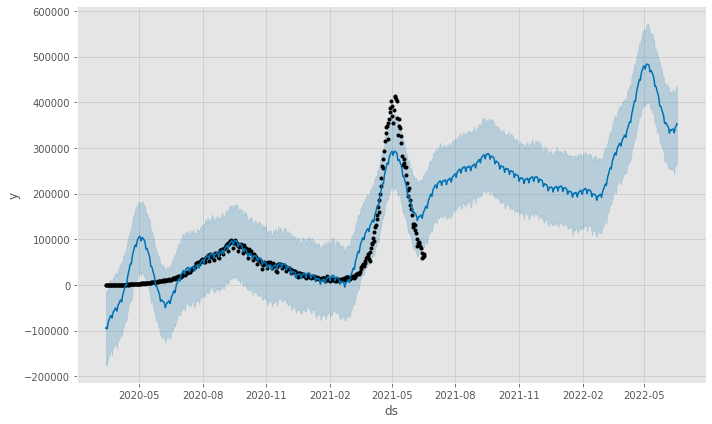

In [119]:
#forecast plot 
confirmed_forecast_plot = m.plot(forecast)
plt.savefig("/content/confirmed_forecast1.png", dpi =1200)

## Predictions

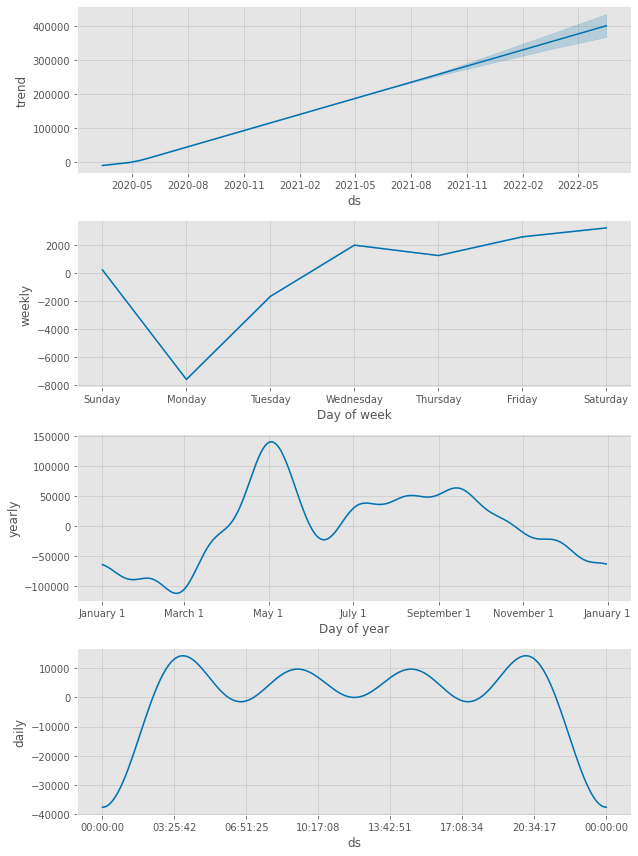

In [116]:
#plot components of forecast
confirmed_forecast_plot =m.plot_components(forecast)
plt.savefig("/content/confirmed_forecast.png", dpi =1200)

# RECOVERED CASES FORECAST

## Model Instantiation and Evaluation

In [ ]:
#instantiating model
m1 = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

In [ ]:
#fit the model
m1.fit(Recovered)

In [ ]:
forecast_1 = m1.predict(future) #predictions

In [ ]:
forecast_1[['ds','yhat','yhat_upper','yhat_lower']].tail(10)

,ds,yhat,yhat_upper,yhat_lower
816,2022-06-08,453757.694286,800478.748796,129456.119243
817,2022-06-09,450971.122113,794142.429464,125586.431217
818,2022-06-10,451969.446525,802762.275938,119623.130416
819,2022-06-11,452363.106003,806071.676073,111030.790447
820,2022-06-12,447948.499815,801581.145546,110613.663767
821,2022-06-13,452305.021037,800898.915583,119384.939827
822,2022-06-14,451807.466481,806176.617138,104147.481652
823,2022-06-15,452792.712314,807745.692239,117189.582261
824,2022-06-16,454511.643545,803475.457377,112518.418937
825,2022-06-17,459847.468981,819163.123533,100523.337202


## Visualizations

In [ ]:
final_df.iplot(kind='scatter',x='Date_YMD',y='Recovered',xTitle='Months',yTitle='Count of Cases',title='Recovered') #visualizations

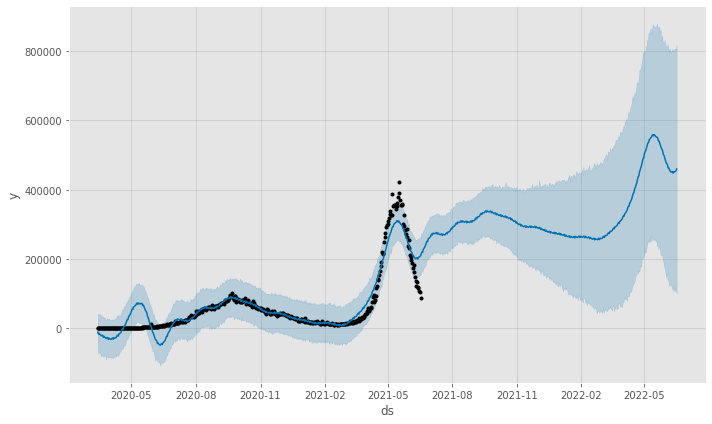

In [118]:
recovered_forecast_plot = m1.plot(forecast_1)
plt.savefig("/content/recovered_forecast1.png", dpi =1200)

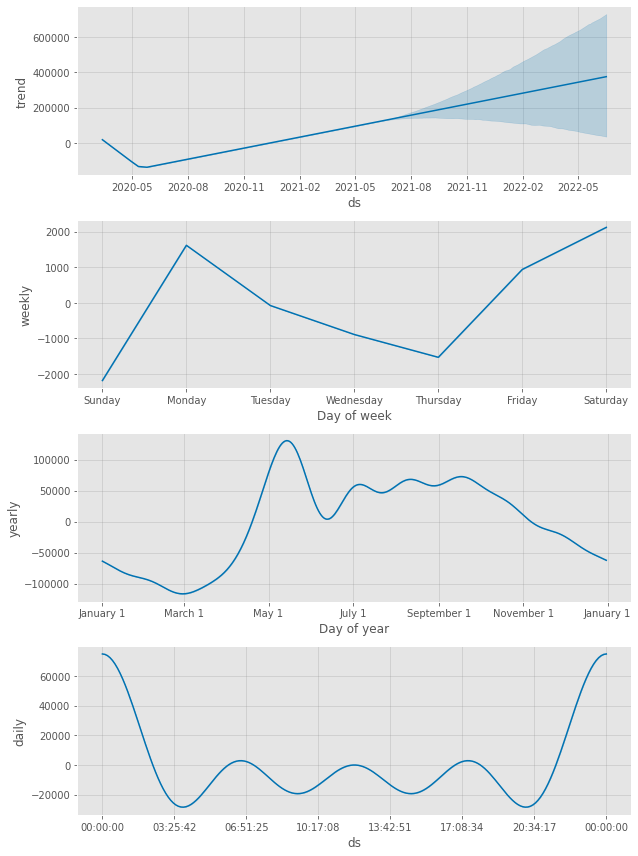

In [115]:
recovered_forecast_plot = m1.plot_components(forecast_1)
plt.savefig("/content/recovered_forecast.png", dpi =1200)

#DECEASED CASES FORECAST

## Model Instantiation and Evaluation

In [ ]:
m2 = Prophet(interval_width=0.9,daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True) #Instantiating Model

In [ ]:
m2.fit(Deceased) 

##Visualizations

In [ ]:
final_df.iplot(kind='scatter',x='Date_YMD',y='Deceased',xTitle='Months',yTitle='Count of Cases',title='DECEASED')

## Predictions

In [ ]:
forecast_2 = m2.predict(future) #predictions

In [ ]:
forecast_2[['ds','yhat','yhat_upper','yhat_lower']].tail(7)

,ds,yhat,yhat_upper,yhat_lower
819,2022-06-11,6638.373923,10896.691094,1744.038189
820,2022-06-12,6633.934279,10888.812848,1770.237911
821,2022-06-13,6590.008398,10921.982102,1601.098906
822,2022-06-14,6714.496836,10955.156314,1820.236947
823,2022-06-15,6758.107014,10979.371912,1838.305023
824,2022-06-16,6718.139326,11105.650136,1719.924684
825,2022-06-17,6788.210694,11065.429906,1713.437574


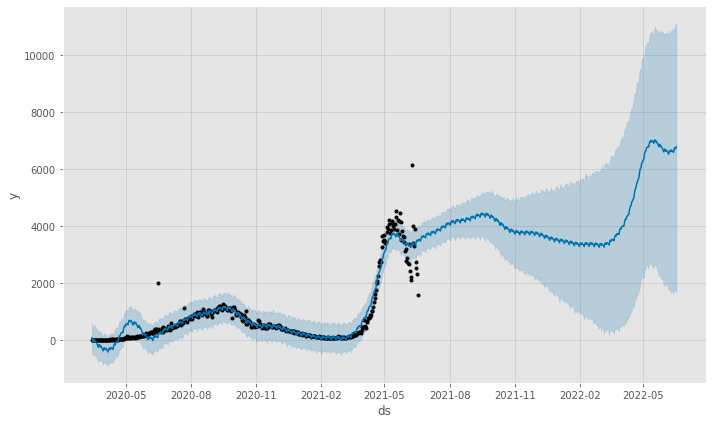

In [117]:
deceased_forecast_plot = m2.plot(forecast_2) #forecast plot
plt.savefig("/content/deceased_forecast1.png", dpi =1200)

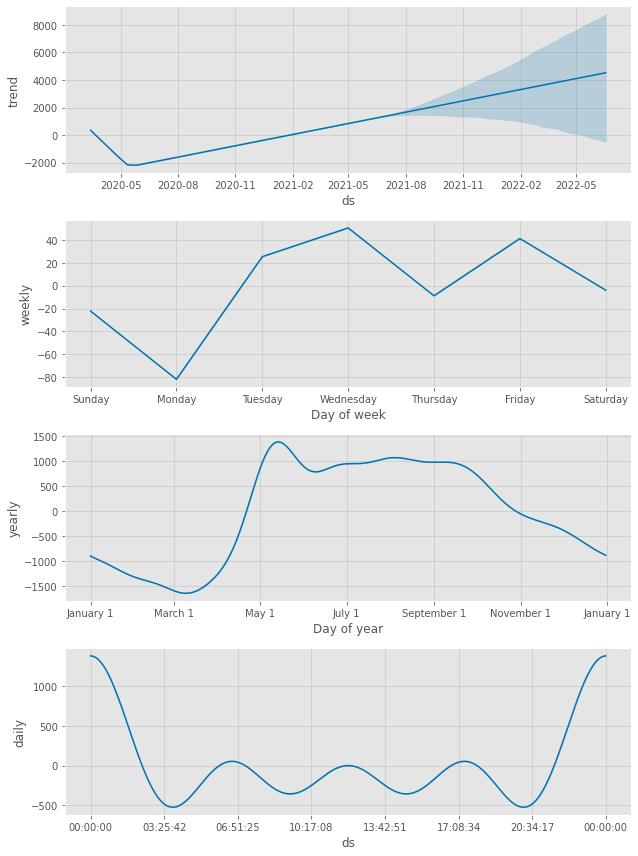

In [114]:
deceased_forecast_plot =m2.plot_components(forecast_2) 
plt.savefig("/content/deceased_forecast.png", dpi =1200)